#📌 Extracción

In [84]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

url_telecomx = ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos_telecomx = requests.get(url_telecomx)
data = json.loads(datos_telecomx.text)
pd.DataFrame(data)



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [85]:
# Normalizacion de la informacion contenida en el jason
datos_telecomx_norm = pd.json_normalize(data)
datos_telecomx_norm
datos_telecomx_norm.info()

datos_telecomx_norm.duplicated().sum()
datos_telecomx_norm.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#🔧 Transformación

In [86]:
# Conversión a tipo float
datos_telecomx_norm['account.Charges.Total'] = pd.to_numeric(datos_telecomx_norm['account.Charges.Total'], errors="coerce")
datos_telecomx_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [87]:
# Eliminando filas vacias de la columna de Churn
datos_telecomx_norm = datos_telecomx_norm[datos_telecomx_norm['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(datos_telecomx_norm))
datos_telecomx_norm.info()

Número de filas después de eliminar las vacías en 'Churn': 7043
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   ob

In [88]:
# Calcular la media ignorando NaN
media_total = datos_telecomx_norm["account.Charges.Total"].mean()

# Reemplazar NaN por la media (sin inplace para evitar FutureWarning)
datos_telecomx_norm["account.Charges.Total"] = datos_telecomx_norm["account.Charges.Total"].fillna(media_total)

datos_telecomx_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [89]:
datos_telecomx_norm

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [90]:
# Crear la columna 'Cuentas_Diarias'
datos_telecomx_norm["Cuentas_Diarias"] = datos_telecomx_norm["account.Charges.Monthly"] / 30

print(datos_telecomx_norm[["account.Charges.Monthly", "Cuentas_Diarias"]].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [91]:
# Renombramos los nombres de las columnas
datos_telecomx_norm.rename(columns={
    'customer.gender': 'gender', 'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner', 'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure', 'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines', 'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity', 'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection', 'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV', 'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract', 'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod', 'account.Charges.Monthly': 'Charges.Monthly',
    'account.Charges.Total': 'Charges.Total'
    }, inplace= True)

#📊 Carga y análisis

In [92]:
# Generamos un analisis descriptivo de los datos
descripcion = datos_telecomx_norm.describe()
print(descripcion)

       SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7043.000000  7043.000000      7043.000000    7043.000000   
mean        0.162147    32.371149        64.761692    2283.300441   
std         0.368612    24.559481        30.090047    2265.000258   
min         0.000000     0.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.500000     402.225000   
50%         0.000000    29.000000        70.350000    1400.550000   
75%         0.000000    55.000000        89.850000    3786.600000   
max         1.000000    72.000000       118.750000    8684.800000   

       Cuentas_Diarias  
count      7043.000000  
mean          2.158723  
std           1.003002  
min           0.608333  
25%           1.183333  
50%           2.345000  
75%           2.995000  
max           3.958333  


## **Visualizaciones**


### 1. Análisis de facturación

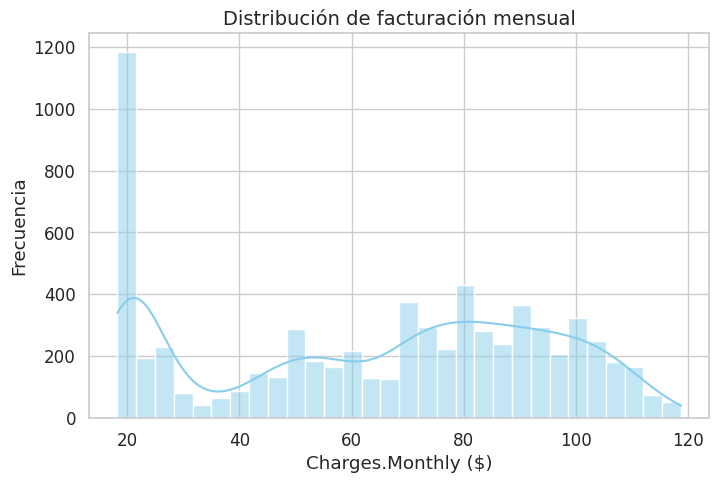

In [94]:
# Estilo de gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Histograma de Charges.Monthly
plt.figure(figsize=(8,5))
sns.histplot(datos_telecomx_norm["Charges.Monthly"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de facturación mensual", fontsize=14)
plt.xlabel("Charges.Monthly ($)")
plt.ylabel("Frecuencia")
plt.show()

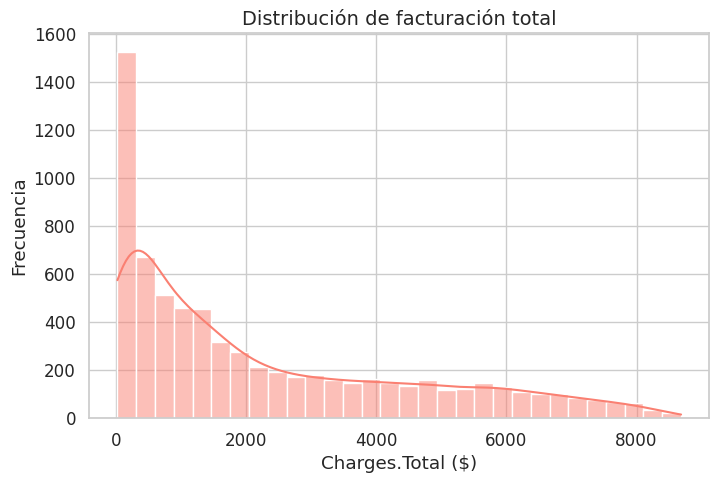

In [95]:
# 2. Histograma de Charges.Total
plt.figure(figsize=(8,5))
sns.histplot(datos_telecomx_norm["Charges.Total"], bins=30, kde=True, color="salmon")
plt.title("Distribución de facturación total", fontsize=14)
plt.xlabel("Charges.Total ($)")
plt.ylabel("Frecuencia")
plt.show()

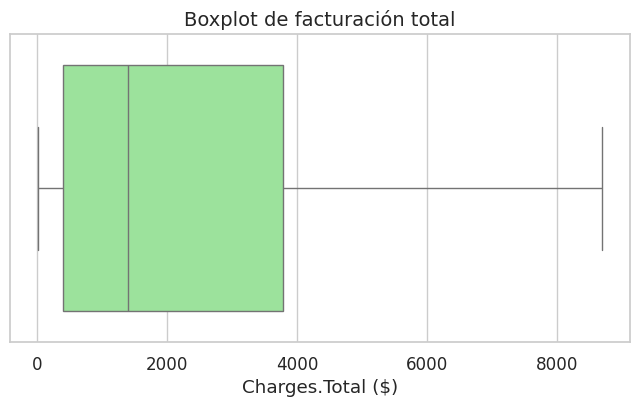

In [96]:
# 3. Boxplot de Charges.Total (detectar outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=datos_telecomx_norm["Charges.Total"], color="lightgreen")
plt.title("Boxplot de facturación total", fontsize=14)
plt.xlabel("Charges.Total ($)")
plt.show()

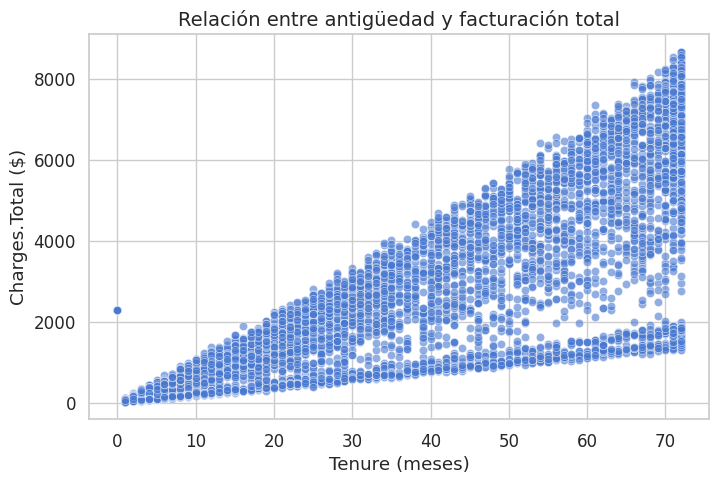

In [97]:
# 4. Dispersión tenure vs Charges.Total
plt.figure(figsize=(8,5))
sns.scatterplot(x="tenure", y="Charges.Total", data=datos_telecomx_norm, alpha=0.6)
plt.title("Relación entre antigüedad y facturación total", fontsize=14)
plt.xlabel("Tenure (meses)")
plt.ylabel("Charges.Total ($)")
plt.show()

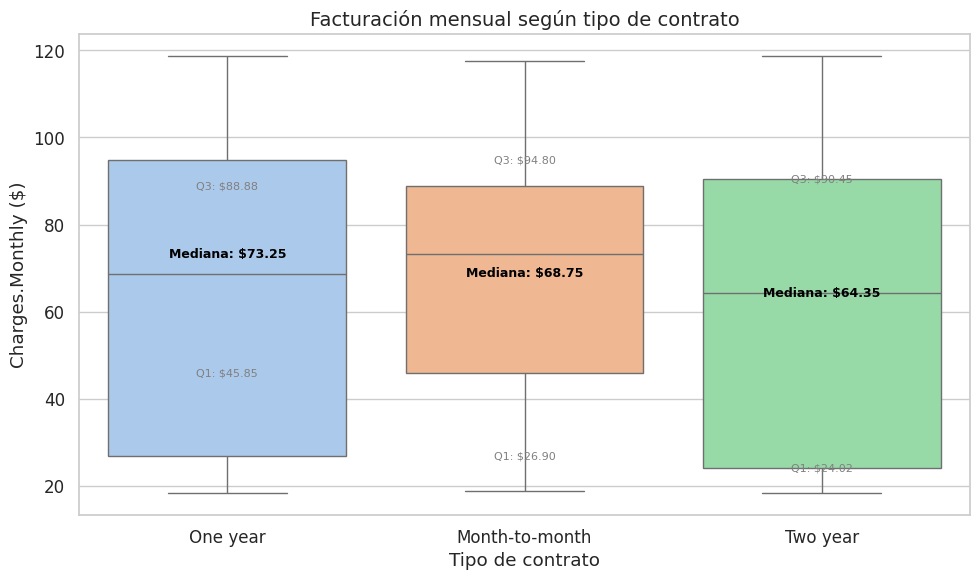

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Contract", y="Charges.Monthly", hue="Contract",
            data=datos_telecomx_norm, palette="pastel", legend=False)

plt.title("Facturación mensual según tipo de contrato", fontsize=14)
plt.xlabel("Tipo de contrato")
plt.ylabel("Charges.Monthly ($)")

# Calcular y mostrar estadísticos en cada caja
grouped = datos_telecomx_norm.groupby('Contract')['Charges.Monthly']
for i, (contract_type, group) in enumerate(grouped):
    q1 = group.quantile(0.25)
    median = group.median()
    q3 = group.quantile(0.75)

    # Mostrar los valores sobre la caja
    plt.text(i, median, f'Mediana: ${median:.2f}', ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.text(i, q1, f'Q1: ${q1:.2f}', ha='center', va='center', fontsize=8, color='gray')
    plt.text(i, q3, f'Q3: ${q3:.2f}', ha='center', va='center', fontsize=8, color='gray')

plt.tight_layout()
plt.show()

### 2. Perfil del cliente

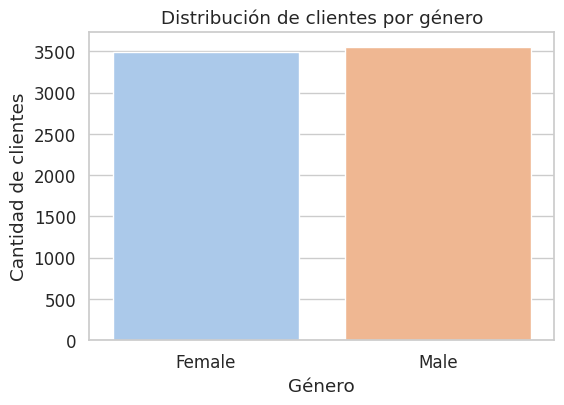

In [99]:
# 1. Distribución por género
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="gender", data=datos_telecomx_norm, palette="pastel", legend=False)
plt.title("Distribución de clientes por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

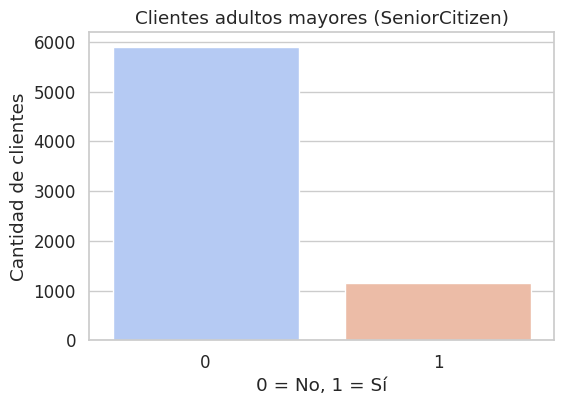

In [100]:
# 2. Porcentaje SeniorCitizen
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="SeniorCitizen", data=datos_telecomx_norm, palette="coolwarm", legend=False)
plt.title("Clientes adultos mayores (SeniorCitizen)")
plt.xlabel("0 = No, 1 = Sí")
plt.ylabel("Cantidad de clientes")
plt.show()

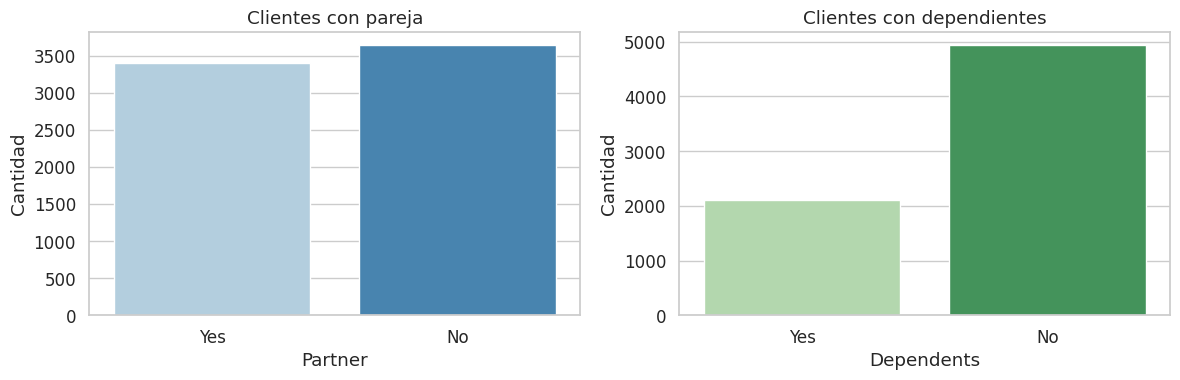

In [101]:
# 3. Distribución de Partner y Dependents
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x="Partner", hue="Partner", data=datos_telecomx_norm, ax=ax[0], palette="Blues", legend=False)
ax[0].set_title("Clientes con pareja")
ax[0].set_xlabel("Partner")
ax[0].set_ylabel("Cantidad")

sns.countplot(x="Dependents", hue="Dependents", data=datos_telecomx_norm, ax=ax[1], palette="Greens", legend=False)
ax[1].set_title("Clientes con dependientes")
ax[1].set_xlabel("Dependents")
ax[1].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()

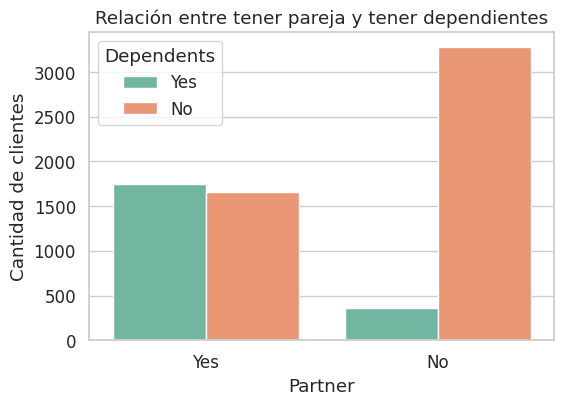

In [102]:
# 4. Relación Partner vs Dependents
plt.figure(figsize=(6,4))
sns.countplot(x="Partner", hue="Dependents", data=datos_telecomx_norm, palette="Set2")
plt.title("Relación entre tener pareja y tener dependientes")
plt.xlabel("Partner")
plt.ylabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-2966193096.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  servicios_binarios = datos_telecomx_norm[servicios_cols].applymap(lambda x: 1 if x=="Yes" else 0)


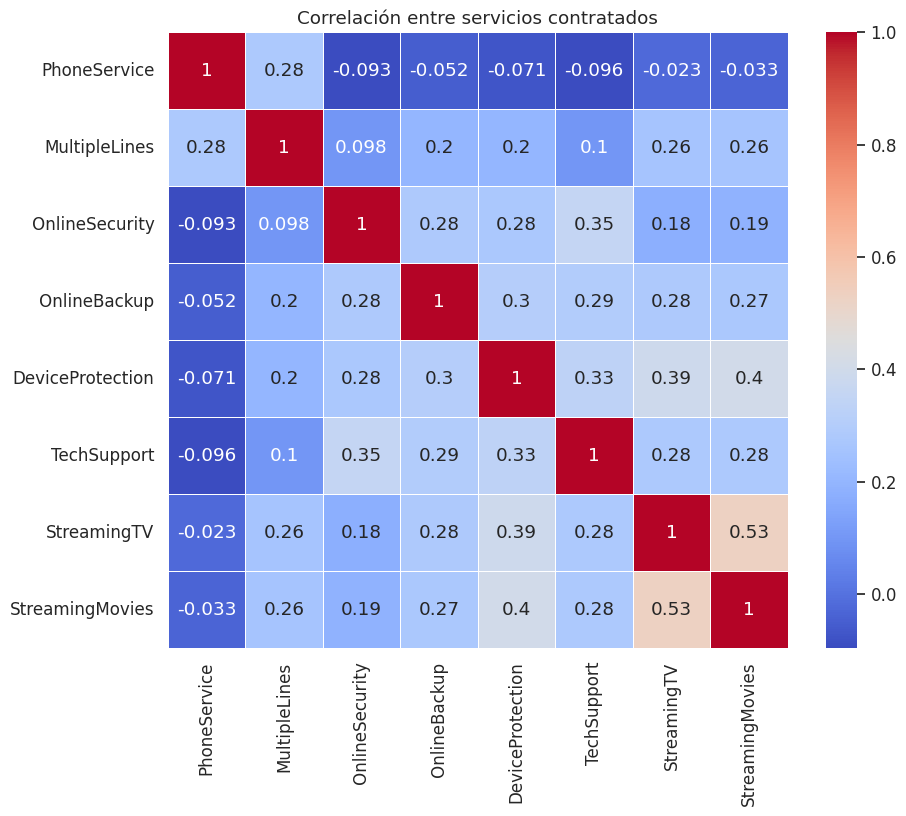

In [103]:
# 5. Heatmap de correlaciones entre servicios contratados
# Seleccionar columnas de servicios (convertir Yes/No a 1/0 para correlación)
servicios_cols = ["PhoneService", "MultipleLines",
                  "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                  "TechSupport", "StreamingTV", "StreamingMovies"]

# Convertir valores Yes/No a 1/0 para correlación
servicios_binarios = datos_telecomx_norm[servicios_cols].applymap(lambda x: 1 if x=="Yes" else 0)

plt.figure(figsize=(10,8))
sns.heatmap(servicios_binarios.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación entre servicios contratados")
plt.show()

### 3. Relación con el Churn

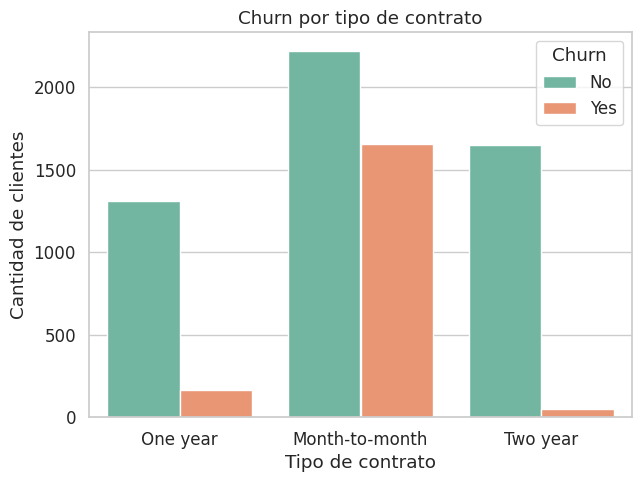

In [104]:
# 1. Churn por tipo de contrato
plt.figure(figsize=(7,5))
sns.countplot(x="Contract", hue="Churn", data=datos_telecomx_norm, palette="Set2")
plt.title("Churn por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

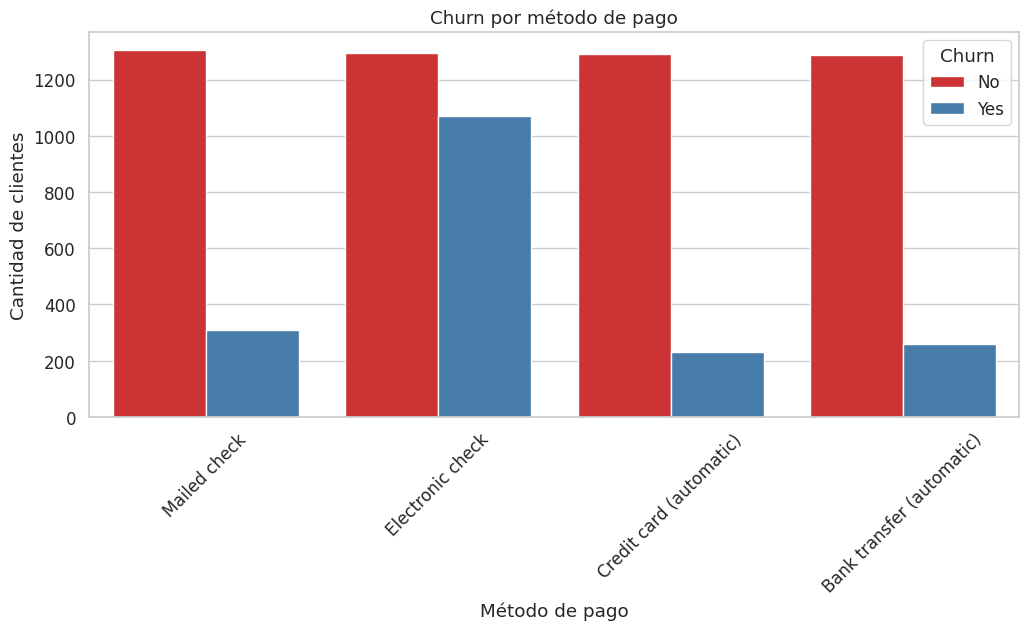

In [105]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=datos_telecomx_norm, palette="Set1")
plt.title("Churn por método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

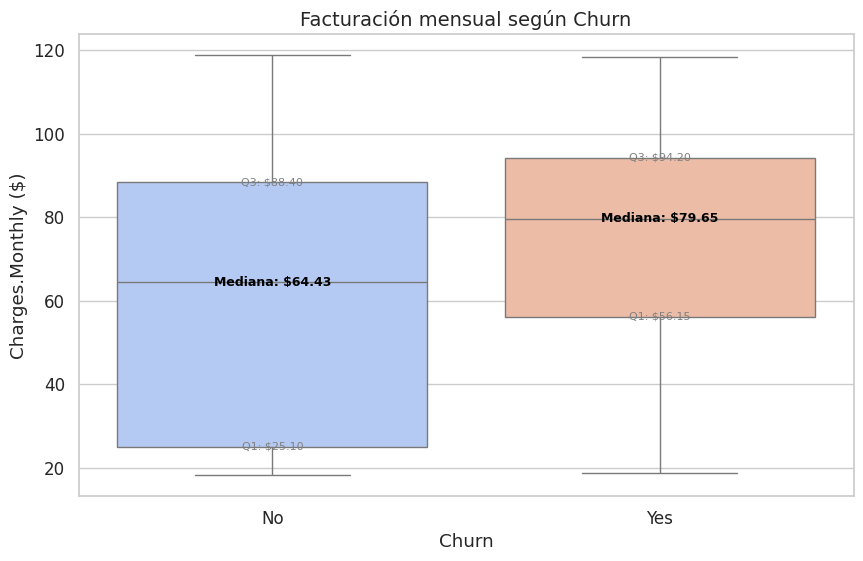

In [106]:
# 3. Comparación de facturación mensual según Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="Charges.Monthly", hue="Churn",
            data=datos_telecomx_norm, palette="coolwarm", legend=False)

plt.title("Facturación mensual según Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Charges.Monthly ($)")

## Calcular y mostrar estadísticos en cada caja
grouped = datos_telecomx_norm.groupby('Churn')['Charges.Monthly']
for i, (contract_type, group) in enumerate(grouped):
    q1 = group.quantile(0.25)
    median = group.median()
    q3 = group.quantile(0.75)

    # Mostrar los valores sobre la caja
    plt.text(i, median, f'Mediana: ${median:.2f}', ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.text(i, q1, f'Q1: ${q1:.2f}', ha='center', va='center', fontsize=8, color='gray')
    plt.text(i, q3, f'Q3: ${q3:.2f}', ha='center', va='center', fontsize=8, color='gray')


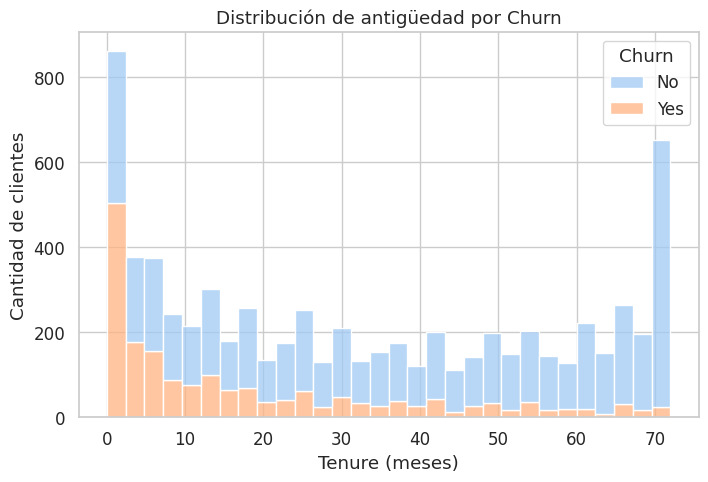

In [107]:
# 4. Histograma de antigüedad (tenure) por Churn
plt.figure(figsize=(8,5))
sns.histplot(data=datos_telecomx_norm, x="tenure", hue="Churn", multiple="stack", bins=30, palette="pastel")
plt.title("Distribución de antigüedad por Churn")
plt.xlabel("Tenure (meses)")
plt.ylabel("Cantidad de clientes")
plt.show()

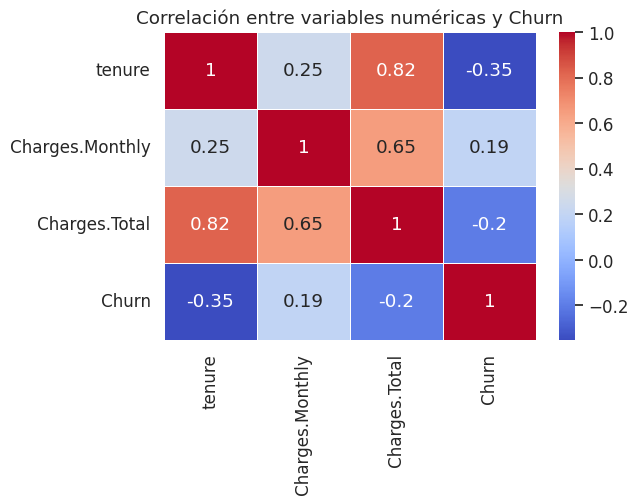

In [108]:
# 5. Mapa de calor de correlaciones numéricas con Churn
# Convertir Churn a 1/0
datos_corr = datos_telecomx_norm.copy()
datos_corr["Churn"] = datos_corr["Churn"].map({"Yes": 1, "No": 0})

# Selección de columnas numéricas relevantes
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Churn"]
plt.figure(figsize=(6,4))
sns.heatmap(datos_corr[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación entre variables numéricas y Churn")
plt.show()

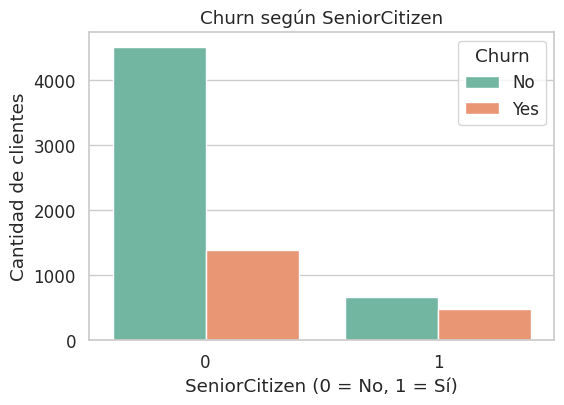

In [109]:
# 1. Churn vs SeniorCitizen
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=datos_telecomx_norm, palette="Set2")
plt.title("Churn según SeniorCitizen")
plt.xlabel("SeniorCitizen (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

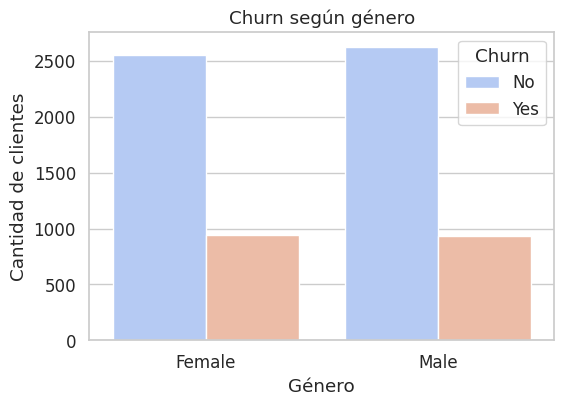

In [110]:
# 2. Churn vs gender
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=datos_telecomx_norm, palette="coolwarm")
plt.title("Churn según género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

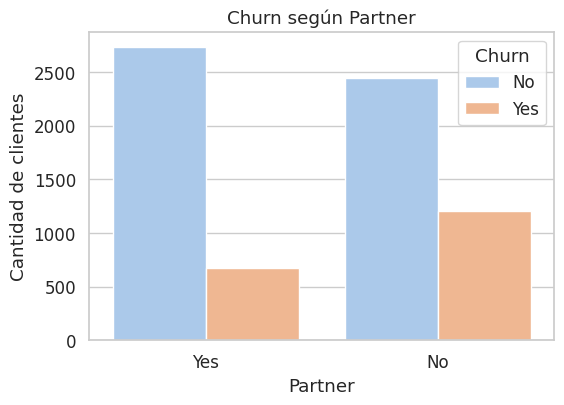

In [111]:
# 3. Churn vs Partner
plt.figure(figsize=(6,4))
sns.countplot(x="Partner", hue="Churn", data=datos_telecomx_norm, palette="pastel")
plt.title("Churn según Partner")
plt.xlabel("Partner")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

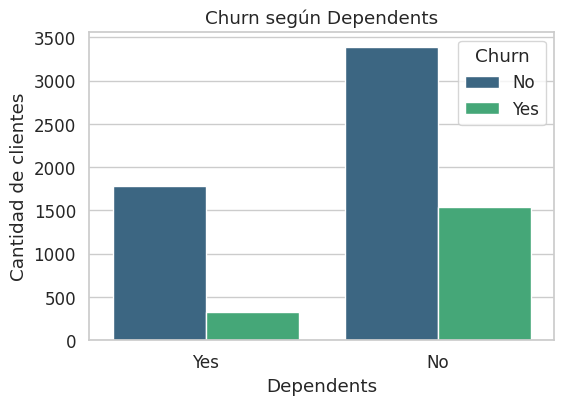

In [112]:
# 4. Churn vs Dependents
plt.figure(figsize=(6,4))
sns.countplot(x="Dependents", hue="Churn", data=datos_telecomx_norm, palette="viridis")
plt.title("Churn según Dependents")
plt.xlabel("Dependents")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

#📄Informe final

#Informe Final – Análisis de Clientes y Churn en TelecomX
##🔹 Introducción
El presente análisis tiene como objetivo identificar patrones en el comportamiento de los clientes de TelecomX, con especial atención al problema de evasión de clientes (Churn).
El churn representa la proporción de clientes que cancelan el servicio en un periodo determinado. Un alto churn implica pérdida de ingresos, incremento en costos de adquisición de nuevos clientes y posibles fallas en la propuesta de valor.
Por ello, se realizó un análisis integral que incluye facturación, perfil sociodemográfico y relación de características con el churn, con el fin de generar insights que permitan reducir la rotación y mejorar la retención.

##🔹 Limpieza y Tratamiento de Datos
Para garantizar la calidad y confiabilidad del análisis, se llevaron a cabo los siguientes pasos:

- Importación de datos desde el archivo telecomx.xlsx y almacenamiento en un DataFrame (datos_telecomx_norm).

- **Conversión de tipos de datos**: Charges.Total convertido a formato float para permitir operaciones numéricas.

- **Tratamiento de valores faltantes (NaN)**: Reemplazo por la media de la columna en Charges.Total para no sesgar el análisis.

- **Creación de variables derivadas**: Cuentas_Diarias calculada dividiendo la facturación mensual (Charges.Monthly) entre 30, para obtener una visión de gasto diario.

- **Verificación final**: Se aseguró que todas las columnas relevantes estuvieran listas para el análisis exploratorio.


##🔹 Análisis Exploratorio de Datos
### 1. Análisis de Facturación
Objetivo: Comprender la distribución de ingresos y su relación con la permanencia de clientes.

*Hallazgos visuales:*

- Los clientes con facturación mensual más alta suelen tener contratos a más largo plazo.

- Se observan picos en montos mensuales asociados a paquetes premium con múltiples servicios.

- El churn es más alto en clientes con facturas bajas o medias, posiblemente por baja percepción de valor o acceso a ofertas más económicas en la competencia.

### 2. Perfil del Cliente
Objetivo: Identificar las características demográficas y contractuales predominantes en la base de clientes.

*Hallazgos visuales:*

- Mayoría de clientes no SeniorCitizen y con género equilibrado (masculino/femenino).

- Contratos más frecuentes: mes a mes, seguidos por anual.

- Alto porcentaje de clientes con facturación electrónica y pago automático.

### 3. Relación con el Churn
Objetivo: Analizar cómo variables demográficas y contractuales influyen en la cancelación.

*Hallazgos visuales y analíticos:*

- Edad: SeniorCitizen presenta mayor churn.

- Género: No hay diferencia significativa.

- Relaciones familiares: Tener pareja o dependientes reduce el churn.

- Combinación Partner + Dependents: El grupo con pareja y dependientes tiene la menor rotación; los que no tienen pareja ni dependientes son los más propensos a irse.

- Servicios adicionales: Clientes con menos servicios contratados tienden a cancelar antes.

##🔹 Conclusiones e Insights
- **Facturación y retención están relacionadas**: Clientes con mayores gastos tienden a mantener contratos más largos.

- **SeniorCitizen vulnerable**: Mayor riesgo de rotación, posiblemente por barreras tecnológicas o percepción de precio elevado.

- **Fuerte relación entre vida familiar y permanencia**: Clientes sin pareja ni dependientes presentan la mayor probabilidad de churn.

- Poca influencia del género en la decisión de cancelación.

- **Servicios adicionales como palanca de retención**: Paquetes más completos parecen correlacionarse con mayor permanencia.

##🔹 Recomendaciones
- **Campañas de retención específicas para clientes SeniorCitizen**:

  - Soporte personalizado.

  - Capacitación digital.

  - Descuentos o paquetes adaptados.

- Ofertas familiares o grupales para clientes sin pareja o dependientes.

- **Incentivos por servicios adicionales**: Descuentos por paquetes combinados (TV + Internet + Móvil).

- **Monitoreo proactivo del churn**: Implementar modelos predictivos para identificar clientes con alto riesgo y actuar antes de la cancelación.

- **Optimización de la percepción de valor**: Comunicación clara de beneficios, mejoras en la atención y flexibilidad contractual.